In [7]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname1 = "electron_30deg_50wob_NOISE120.mscw.fits"
with fits.open(fname1) as hdul:
   df1 = Table.read(hdul[1]).to_pandas()

In [21]:
df1.head()

,runNumber,EVENT_ID,MJD,Time,TargetElev,TargetAz,TargetDec,TargetRA,WobbleN,WobbleE,...,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,ENERGY_MC,El,RA,DEC
0,301200,687,0,7205.416073,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009766,1.389887,1549.211914,0.000000,0.292370,4161.781250,0.947242,60.069143,0.0,0.0
1,301200,733,0,7205.784078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.075913,1359.550049,0.000000,-0.387902,1142.989014,0.412226,60.046007,0.0,0.0
2,301200,971,0,7207.688103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.313970,506.331024,0.000000,3.665224,726.827454,0.225460,60.573046,0.0,0.0
3,301200,1451,0,7211.528155,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159045,-1.847678,1097.658569,0.000000,-2.297319,852.899780,0.332203,59.655342,0.0,0.0
4,301200,1739,0,7213.832186,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.183963,5993.082520,0.030323,1.688663,2358.001953,1.144007,59.975325,0.0,0.0


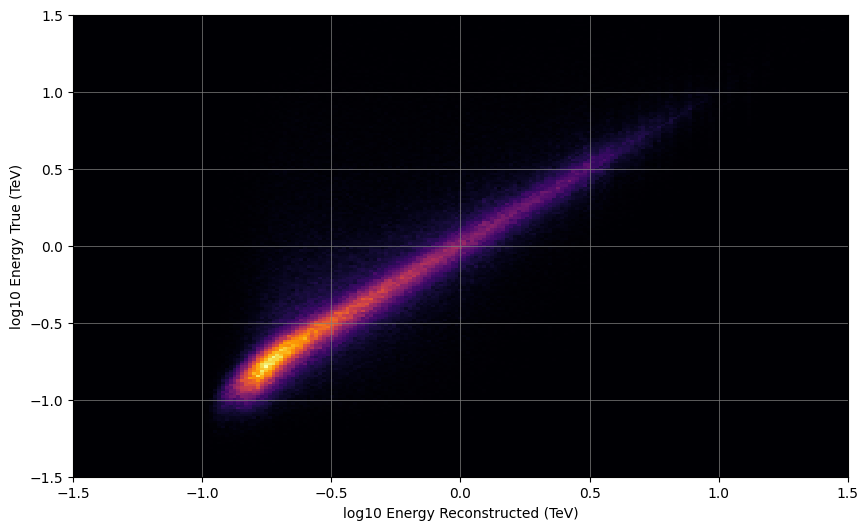

In [214]:
fig, ax = plt.subplots(figsize = (10,6))

h = ax.hist2d(np.log10(df1['ENERGY']),np.log10(df1['ENERGY_MC']), bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno')
#fig.colorbar(h[3], ax=ax)
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_ylabel('log10 Energy True (TeV)')
ax.set_xlabel('log10 Energy Reconstructed (TeV)')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
plt.show()

In [10]:
rec = df1['ENERGY']
true = df1['ENERGY_MC']

In [11]:
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean)**2) / (2 * sigma**2))

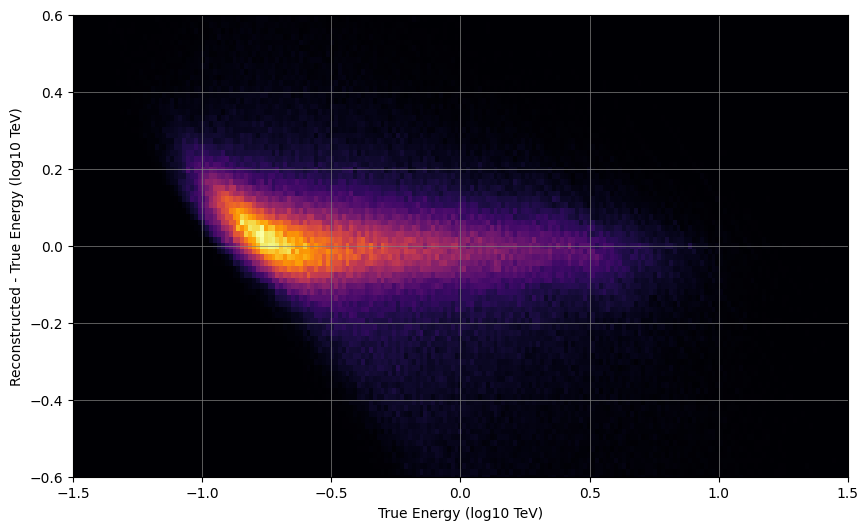

Scatter is about 0.1028 (white dashed line)


In [225]:
from scipy.optimize import curve_fit

y = np.log10(rec)-np.log10(true)
x = np.log10(true)
H, xedges, yedges = np.histogram2d(x,y, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

for i in range(H.shape[1]):
    data = H[:, i]  # Vertical slice of the 2D histogram
    xdata = np.linspace(-1.5, 1.5, len(data))

    # Perform the fit
    p0 = [np.max(data), np.mean(data), 1]  # Initial parameter guesses
    popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

#    fits.append(popt)  # Fit parameters
#    errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    
    
    if np.logical_and(xdata[i]<0.8,xdata[i]>-1.1):
        spread.append(abs(popt[2]))
        #ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

# for i, fit in enumerate(fits):
#     fit_data = gaussian(xdata, *fit)
#     ax.plot(xdata, fit_data, 'r-', alpha=0.5)
#     ax.fill_between(xdata, fit_data - 2 * errors[i][0], fit_data + 2 * errors[i][0], alpha=0.2)

h=ax.hist2d(x,y, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap ='inferno',density =True)

ax.grid(color='gray', linestyle='-', linewidth=0.5)
#ax.axhline(y=0, linestyle='-',color = 'white')
#ax.axhline(y=np.mean(spread), ls='--', color='w')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-0.5,0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.6,0.6)
plt.show()

print(f'Scatter is about {round(np.mean(spread),4)} (white dashed line)')
#print(spread)

# Data Preprocessing

In [443]:
electron = df1.copy()

In [444]:
electron.drop(['runNumber', 'EVENT_ID', 'MJD', 'Time', 'TargetElev', 'TargetAz', 'TargetDec',
        'TargetRA', 'WobbleN', 'WobbleE', 'LTrig', 'NTrig', 'NImages', 'ImgSel', 'NTtype',
        'img2_ang', 'ra', 'dec', 'theta2', 'ENERGY', 'dES', 'NTelPairs', 'TIME', 'timeOfDay',
        'El', 'RA', 'DEC', 'EChi2S', 'Ze', 'MWR', 'MLR', 'Xoff_derot', 'Yoff_derot','MeanPedvar',
        'NMSCW','EmissionHeightChi2'], axis=1, inplace=True)

In [445]:
electron.dtypes  # params that may be important

Az                float64
Xoff              float64
Yoff              float64
XCore             float64
YCore             float64
MSCW              float64
MSCL              float64
EmissionHeight    float32
SizeSecondMax     float64
Core              float64
loss_0            float64
tgrad_x_0         float64
size2_0           float64
loss_1            float64
tgrad_x_1         float64
size2_1           float64
loss_2            float64
tgrad_x_2         float64
size2_2           float64
loss_3            float64
tgrad_x_3         float64
size2_3           float64
ENERGY_MC         float64
dtype: object

In [446]:
electron.head()

,Az,Xoff,Yoff,XCore,YCore,MSCW,MSCL,EmissionHeight,SizeSecondMax,Core,...,loss_1,tgrad_x_1,size2_1,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,ENERGY_MC
0,7.355126,-0.517946,0.310960,-160.028687,-98.294327,0.712218,-0.303267,11.810599,2185.285400,187.805631,...,0.000000,0.928970,2185.285400,0.009766,1.389887,1549.211914,0.000000,0.292370,4161.781250,0.947242
1,225.021881,-0.681965,0.945682,-73.578705,-11.539145,-0.223282,-0.100045,13.080954,1359.550049,74.478035,...,0.095673,0.769036,1779.648193,0.000000,-0.075913,1359.550049,0.000000,-0.387902,1142.989014,0.412226
2,3.331833,-0.522114,-0.515060,89.756386,41.523113,0.522603,0.823723,12.043703,586.034302,98.895792,...,0.000000,-1.093377,586.034302,0.000000,-1.313970,506.331024,0.000000,3.665224,726.827454,0.225460
3,86.292686,0.590323,0.536518,-154.605072,41.275723,0.324995,-0.435141,12.536512,852.899780,160.020041,...,0.000000,0.000000,0.000000,0.159045,-1.847678,1097.658569,0.000000,-2.297319,852.899780,0.332203
4,258.037445,0.830394,-0.456320,191.095215,139.306458,-0.242782,0.298878,9.852885,5675.086426,236.481860,...,0.000000,1.226071,2350.862549,0.000000,0.183963,5993.082520,0.030323,1.688663,2358.001953,1.144007


For preprocessing the data I first took the log of ENERGY_MC so I am reconstructing the log. Then I use scikit learn's StandardScaler. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [447]:
electron['ENERGY_MC'] = np.log10(electron['ENERGY_MC'])

In [448]:
electron['ENERGY_MC']

0        -0.023539
1        -0.384865
2        -0.646931
3        -0.478596
4         0.058429
            ...   
466417   -0.143905
466418   -0.925211
466419   -0.004670
466420   -0.260654
466421   -0.186063
Name: ENERGY_MC, Length: 466422, dtype: float64

In [449]:
from sklearn.preprocessing import StandardScaler

In [450]:
scaler = StandardScaler()

In [451]:
scaler.fit(electron)

StandardScaler()

In [452]:
electron_scaled = scaler.transform(electron)

In [453]:
electron_scaled.shape  # I'll just have to remember which columns are which

(466422, 23)

In [454]:
#from sklearn.feature_selection import RFECV
from scipy.stats import uniform, randint

from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from xgboost import XGBRegressor

In [455]:
X = electron_scaled[:200000,:-1]  # every column besides last one which is true energy
y = electron['ENERGY_MC'][:200000]

X.shape, y.shape

((200000, 22), (200000,))

In [456]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134000, 22) (66000, 22) (134000,) (66000,)


In [457]:
xgbr = XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [458]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [459]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.91


In [460]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.91


In [461]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
R2 = r2_score(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(0.5)))
print(f"R2 score: {R2}")

MSE: 0.02
RMSE: 0.15
R2 score: 0.9108543127840877


In [462]:
true_energy = df1['ENERGY_MC'][:200000]
rec_energy = xgbr.predict(X)
#scaler.fit(rec_energy.reshape(-1, 1))

In [463]:
#rec_scaled = scaler.transform(rec_energy.reshape(-1, 1))
#rec_scaled = rec_scaled.reshape(1,200000).flatten()

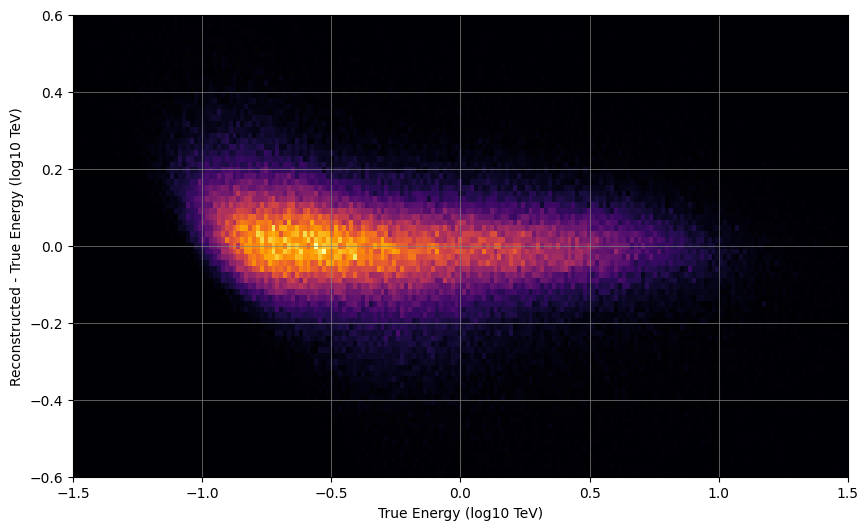

In [464]:
y_val = rec_energy-np.log10(true_energy)
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

# for i in range(H.shape[1]):
#     data = H[:, i]  # Vertical slice of the 2D histogram
#     xdata = np.linspace(-1.5, 1.5, len(data))

#     #Perform the fit
#     p0 = [np.max(data), np.mean(data), 0.05]  # Initial parameter guesses
#     popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

#     #fits.append(popt)  # Fit parameters
#     #errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    
#     if np.logical_and(xdata[i]<1.0,xdata[i]>-1.1):
#         spread.append(popt[2])
#         #ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=0.5)
#ax.axhline(y=0, linestyle='-',color = 'white')
#ax.axhline(y=np.mean(spread), linestyle='--',color = 'white')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.6,0.6)
plt.show()

#print(f'Scatter is about {round(np.mean(spread),4)}')

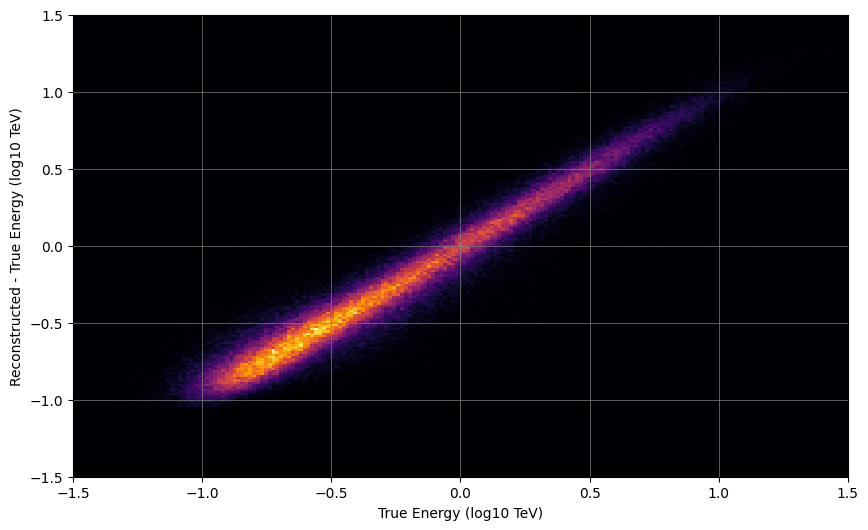

In [465]:
y_val = rec_energy
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

# ax.set_xlim(-1.0,1.0)
# ax.set_ylim(-1.0,1.0)
plt.show()

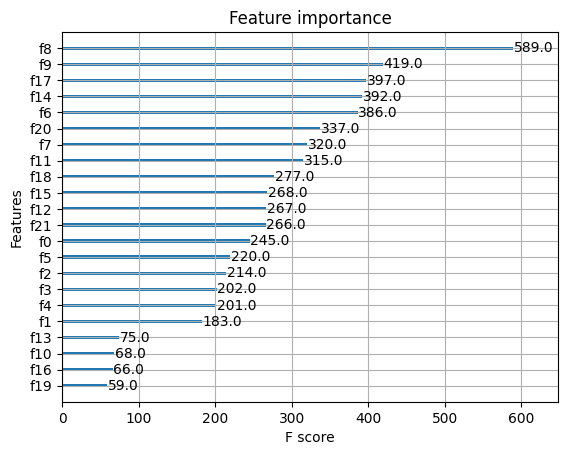

Text(0.5, 1.0, 'Feature Importance (MDI)')

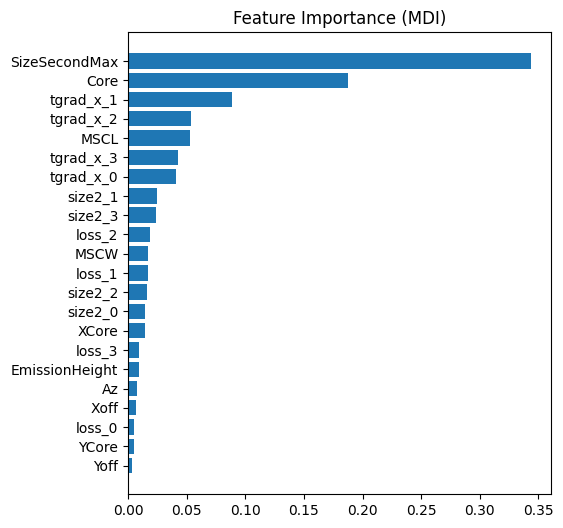

In [466]:
from xgboost import plot_importance
from sklearn.inspection import permutation_importance
plot_importance(xgbr)
plt.show()

feature_importance = xgbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
names = electron.columns

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, names[sorted_idx])
plt.title("Feature Importance (MDI)")

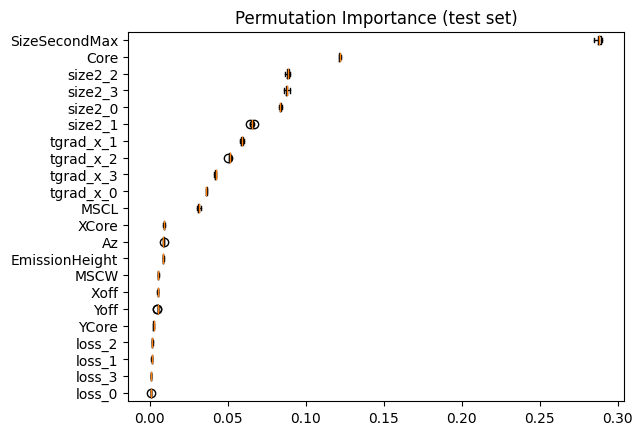

In [467]:
result = permutation_importance(
    xgbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=names[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## One issue before...

I was not reconstructing the log of the energy. Below are the plots of my mistake.

/tmp/ipykernel_703/770180870.py:1: RuntimeWarning: invalid value encountered in log10
  y_val = np.log10(rec_energy)-np.log10(true_energy)


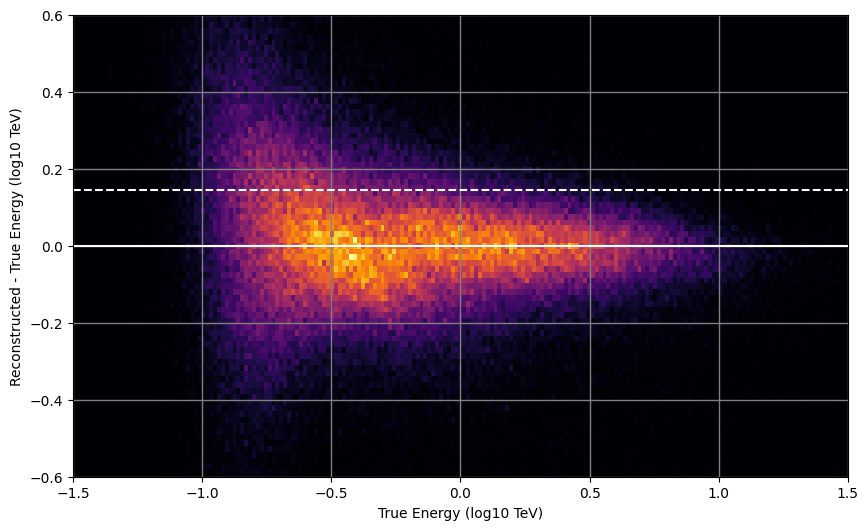

Scatter is about 0.1448


In [116]:
y_val = np.log10(rec_energy)-np.log10(true_energy)
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

for i in range(H.shape[1]):
    data = H[:, i]  # Vertical slice of the 2D histogram
    xdata = np.linspace(-1.5, 1.5, len(data))

    #Perform the fit
    p0 = [np.max(data), np.mean(data), 0.1]  # Initial parameter guesses
    popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

    #fits.append(popt)  # Fit parameters
    #errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    
    if np.logical_and(xdata[i]<1.0,xdata[i]>-1.1):
        spread.append(popt[2])
        #ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=1)
ax.axhline(y=0, linestyle='-',color = 'white')
ax.axhline(y=np.mean(spread), linestyle='--',color = 'white')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.6,0.6)
plt.show()

print(f'Scatter is about {round(np.mean(spread),4)}')

/tmp/ipykernel_703/4105753317.py:1: RuntimeWarning: invalid value encountered in log10
  y_val = np.log10(rec_energy)


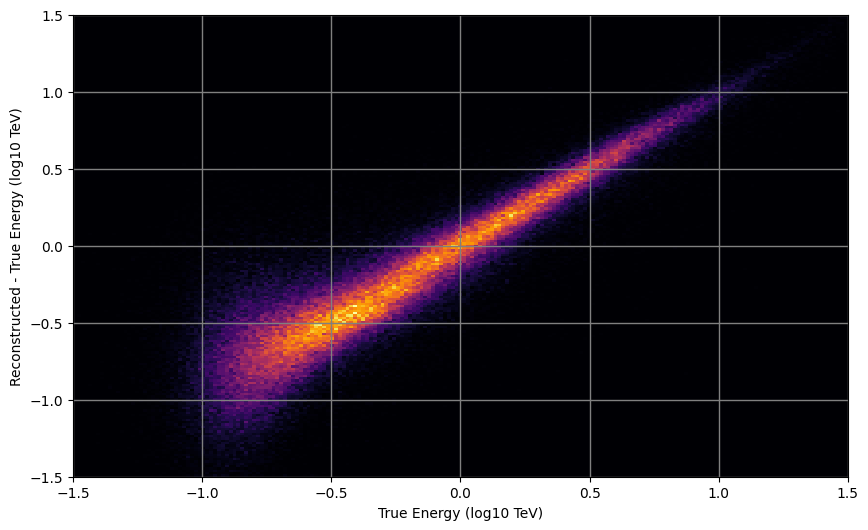

In [117]:
y_val = np.log10(rec_energy)
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=1)
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

# ax.set_xlim(-1.0,1.0)
# ax.set_ylim(-1.0,1.0)
plt.show()

## Hyperparameter tuning

Before, I ran the model with default parameters. Here I am trying to maximize the mean cross validation score by searching for the best parameters in multiple tests because they take a long time.

In [492]:
xgbr1 = XGBRegressor(learning_rate=0.1,
                     n_estimators=500,
                     max_depth = 10,
                     min_child_weight = 4,
                     subsample = 0.85,
                     colsample_bytree = 0.85,
                     gamma=0,
                     seed=42,
                     verbosity=0) 

In [493]:
xgbr1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [494]:
ypred = xgbr1.predict(X_test)
mse = mean_squared_error(y_test, ypred)
R2 = r2_score(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(0.5)))
print(f"R2 score: {R2}")

MSE: 0.02
RMSE: 0.14
R2 score: 0.9253730222549804


In [501]:
kf_cv_scores = cross_val_score(xgbr1, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.5f" % kf_cv_scores.mean())

K-fold CV average score: 0.92478


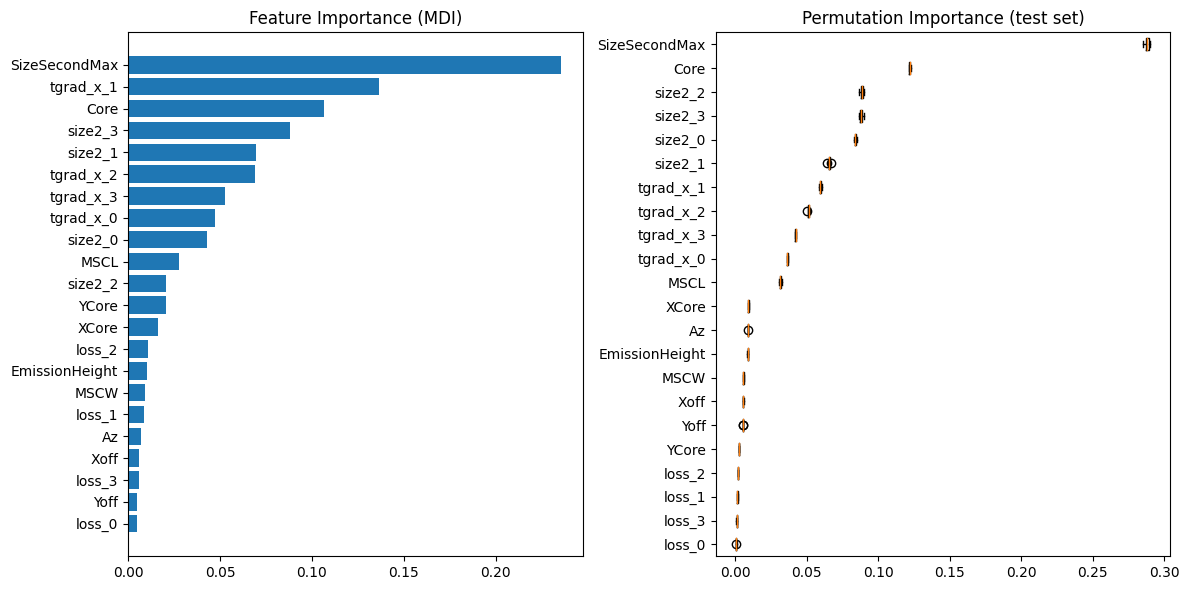

In [508]:
feature_importance = xgbr1.feature_importances_
sorted_idx = np.argsort(feature_importance)
names = electron.columns

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, names[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=names[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Note about feature importance

It's possible that since some parameters are correlated, the true feature importance may differ.

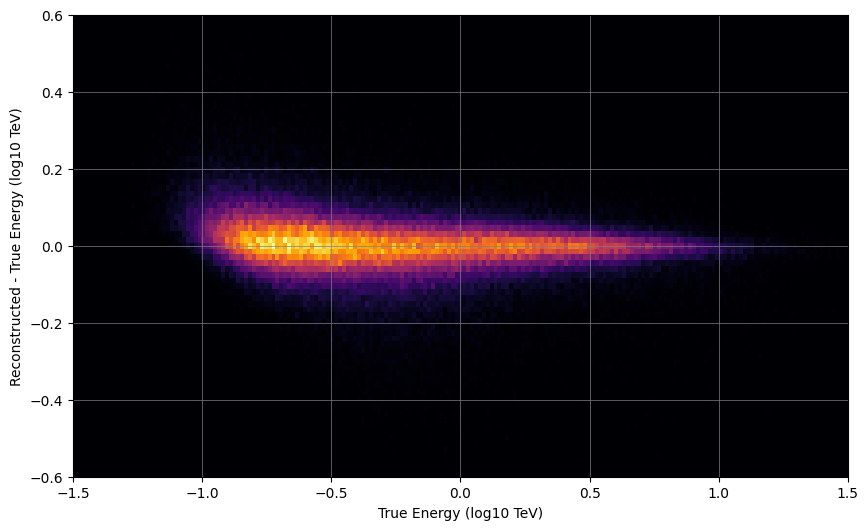

Scatter is about 0.0549


In [506]:
true_energy = df1['ENERGY_MC'][:200000]
rec_energy = xgbr1.predict(X)

y_val = rec_energy-np.log10(true_energy)
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-0.6,0.6,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

for i in range(H.shape[1]):
    data = H[:, i]  # Vertical slice of the 2D histogram
    xdata = np.linspace(-1.5, 1.5, len(data))

    #Perform the fit
    p0 = [np.max(data), np.mean(data), 0.01]  # Initial parameter guesses
    popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

    #fits.append(popt)  # Fit parameters
    #errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    
    if np.logical_and(xdata[i]<1.0,xdata[i]>-1.1):
        spread.append(popt[2])
        #ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=0.5)
#ax.axhline(y=0, linestyle='-',color = 'white')
#ax.axhline(y=np.mean(spread), linestyle='--',color = 'white')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.6,0.6)
plt.show()

print(f'Scatter is about {round(np.mean(spread),4)}')

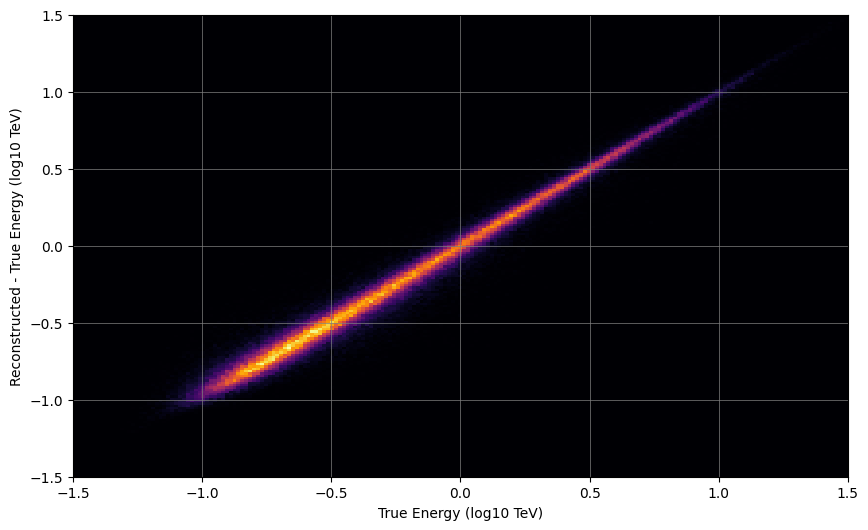

In [499]:
y_val = rec_energy
x_val = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

h = ax.hist2d(x_val,y_val, bins=[np.linspace(-1.5,1.5,200), np.linspace(-1.5,1.5,200)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

# ax.set_xlim(-1.0,1.0)
# ax.set_ylim(-1.0,1.0)
plt.show()

Below were the searches I was going to perform to optimize the xgboostregressor model.

In [474]:
param_test1 = {
 'max_depth':[5,6,7],
 'min_child_weight':[4,5,6]
}

gsearch1 = GridSearchCV(estimator = xgbr1,param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.7,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=4, missing=nan,
                                    monotone_constraints=None, n_estimators=150,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'min_child_weight': [4, 5, 6]},
             scoring='neg_mean_absolute_error')

In [475]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 4}, -0.09842079180411707)

In [ ]:
param_test1b = {
 'max_depth':[10,11,12,13],
 'min_child_weight':[1,2]
}


gsearch1b = GridSearchCV(estimator = xgbr1b,param_grid = param_test1b, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch1b.fit(X,y)

In [ ]:
gsearch1b.best_params_, gsearch1b.best_score_

In [ ]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(estimator = xgbr2,param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch2.fit(X,y)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch3 = GridSearchCV(estimator = xgbr3,param_grid = param_test3, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch3.fit(X,y)

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch4 = GridSearchCV(estimator = xgbr4,param_grid = param_test4, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch4.fit(X,y)

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = xgbr5,param_grid = param_test5, scoring='neg_mean_absolute_error',n_jobs=-1, cv=5)
gsearch5.fit(X,y)

In [ ]:
gsearch5.best_params_, gsearch5.best_score_